# Lung Cancer Histopathological Images Dataset

The **Lung Cancer Histopathological Images** dataset, available on *Kaggle*, is a valuable resource for research in lung cancer classification using histopathological images.  

It consists of **15,000 high-resolution (768x768 pixels) JPEG images**, divided into three distinct classes:  
- **Lung Benign Tissue**  
- **Lung Adenocarcinoma**  
- **Lung Squamous Cell Carcinoma**  

Each class contains **5,000 images**, ensuring a balanced dataset for training and testing machine learning models.  

This dataset is a subset of the original **LC25000** dataset introduced by Borkowski et al. in *2019*, which included **25,000 images** across five categories. The Kaggle version specifically focuses on lung tissue, making it highly relevant for projects in lung cancer detection and classification.  

The images were generated from an initial set of **750 histopathological samples**, which were **augmented** to expand the dataset and increase diversity. This ensures the robustness and generalizability of models trained on this data.  

The dataset is fully **de-identified** and **HIPAA compliant**, ensuring that patient privacy and ethical guidelines are strictly maintained.  

Research using this dataset has demonstrated its effectiveness, with deep learning models achieving classification accuracies ranging from **\textcolor{blue}{81\%} to \textcolor{blue}{92\%}**.  

In conclusion, the **Lung Cancer Histopathological Images** dataset serves as a critical tool for advancing machine learning applications in lung cancer diagnosis, facilitating early detection and improved patient outcomes.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0664.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/1269.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3863.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2193.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0733.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3750.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2008.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2081.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0106.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0375.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3919.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3

### Explanation of Code

This code snippet visualizes three sample images from the **Lung Cancer Histopathological Images** dataset, showcasing different categories: **Adenocarcinoma**, **Benign**, and **Squamous Cell Carcinoma**. Using `matplotlib`, the images are loaded from their respective file paths and displayed side by side in a single figure. Titles are added above each image to indicate their class, and axes are removed for a cleaner visual presentation. This visualization provides an intuitive understanding of the dataset’s image characteristics.


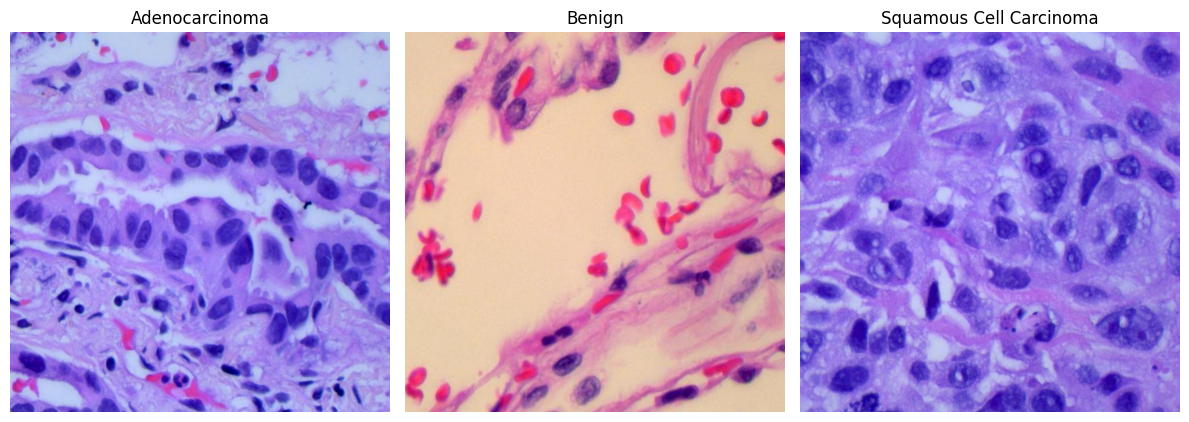

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the images
image_paths = [
    '/kaggle/input/lung-cancer-histopathological-images/adenocarcinoma/3410.jpg',
    '/kaggle/input/lung-cancer-histopathological-images/benign/4601.jpg',
    '/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/1830.jpg'
]

# Titles for the images
image_titles = ['Adenocarcinoma', 'Benign', 'Squamous Cell Carcinoma']

# Display the images
plt.figure(figsize=(12, 8))

for i, image_path in enumerate(image_paths):
    # Load and plot the image
    img = mpimg.imread(image_path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(image_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Explanation of Code

This code demonstrates a **sample of data augmentation** for images in the **Lung Cancer Histopathological Images** dataset. The images are resized to **150x150 pixels** and augmented using techniques such as **rotation, width and height shifts, zooming, and horizontal flips**. The augmented images are loaded in batches using the `ImageDataGenerator` class, with a validation split of **20%** to separate training and validation data.  

**Note:** This is **only a visualization of sample augmented images**. The actual augmentation for dataset preparation will be performed in the next cell. The plot displays five augmented images along with their respective labels to show the effect of augmentation techniques.


Found 12000 images belonging to 3 classes.


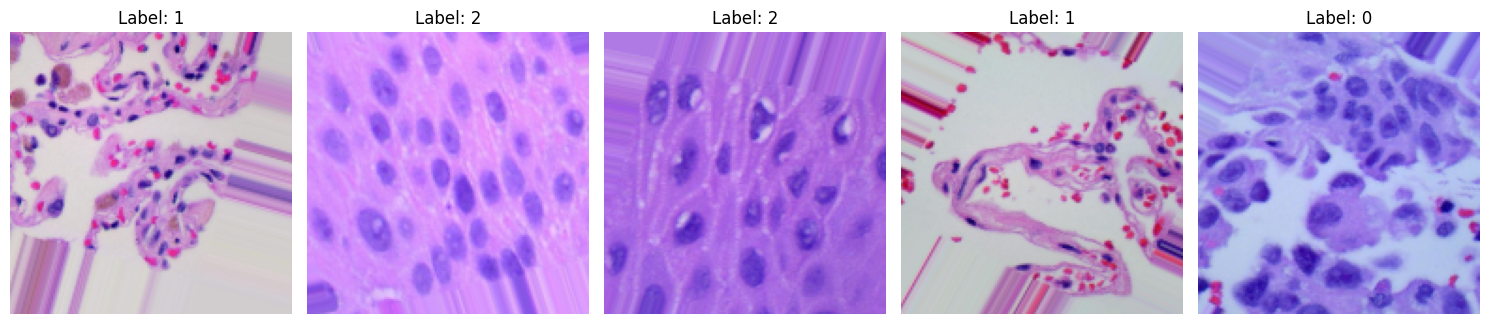

In [3]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Data Path (Assuming you have a local path to images)
base_dir = '/kaggle/input/lung-cancer-histopathological-images'  # Change this to your directory if needed

# Image size and batch size
image_size = (150, 150)  # Smaller size for visualization (adjust as needed)
batch_size = 8  # Batch size for training

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescaling pixel values to between 0 and 1
    rotation_range=30,  # Random rotations in the range of 30 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    validation_split=0.2  # Split data into training and validation
)

# Loading a batch of augmented images
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Only use training subset
)

# Get a batch of augmented images
augmented_images, augmented_labels = next(train_generator)

# Number of images to display
num_images = 5

# Set up the plot grid for visualizing augmented images
fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

# Loop through the images and display them
for i in range(num_images):
    axes[i].imshow(augmented_images[i])
    axes[i].axis('off')
    axes[i].set_title(f'Label: {np.argmax(augmented_labels[i])}')  # Displaying the label of the image

plt.tight_layout()
plt.show()


### Flowchart for the CNN Model

```plaintext
   +---------------------+
   |  Data Preprocessing |
   +---------------------+
            |
            |
    +-------------------+
    |  Image Augmentation |
    +-------------------+
            |
            |
    +-------------------------+
    |  Training and Validation |
    |  Data Generation (Image) |
    +-------------------------+
            |
            |
      +------------------+
      |  Model Building  |
      +------------------+
            |
            |
    +-----------------------------+
    |  Model Compilation & Setup  |
    |  Optimizer, Loss, Metrics   |
    +-----------------------------+
            |
            |
    +------------------------+
    | Model Training (Fit)   |
    +------------------------+
            |
            |
    +-----------------------------+
    | Evaluation with Validation  |
    +-----------------------------+
            |
            |
   +----------------------+
   |  Saving Best Model   |
   +----------------------+
            |
            |
   +----------------------------+
   |   Final Model Evaluation   |
   +----------------------------+


### Explanation of Code: Neural Network Setup for Lung Cancer Classification

#### Importing Required Libraries
The following key libraries and modules are imported:
- `numpy`: For numerical operations and array manipulation.
- `tensorflow.keras.models.Sequential`: To define a sequential model for building the neural network layer by layer.
- `tensorflow.keras.layers`: Various types of layers are imported, including:
  - `Conv2D`: Convolutional layers for feature extraction.
  - `MaxPooling2D`: Pooling layers to reduce the spatial dimensions of feature maps.
  - `Flatten`: Converts 2D feature maps into 1D vectors.
  - `Dense`: Fully connected layers for classification.
  - `Dropout`: For regularization, preventing overfitting by randomly setting a fraction of input units to 0.
  - `BatchNormalization`: To normalize the inputs and speed up training.
  - `GlobalAveragePooling2D`: A pooling layer to reduce each feature map to a single number.
- `tensorflow.keras.optimizers.Adam`: The Adam optimizer, an adaptive learning rate optimization algorithm.
- `ImageDataGenerator`: For real-time data augmentation and rescaling.
- `tensorflow.keras.callbacks`: Includes `EarlyStopping` to stop training if validation performance stops improving, and `ModelCheckpoint` to save the best model during training.

#### Setting the Data Path
The dataset is assumed to be stored in the directory:  
`/kaggle/input/lung-cancer-histopathological-images`.  
This directory will be used to load and preprocess the images.

#### Data Preprocessing
- **Image Size**: The images are resized to **768x768 pixels** to match the input requirements of the model.
- **Batch Size**: A batch size of **8** is set to optimize memory usage during training, especially since high-resolution images require significant computational resources.

#### Purpose
This snippet lays the groundwork for a convolutional neural network (CNN) that will classify histopathological images into their respective categories (e.g., benign or cancerous). It prepares the dataset for use with a model designed to leverage convolutional layers for feature extraction and fully connected layers for classification.

Further steps will involve:
1. Data augmentation using `ImageDataGenerator`.
2. Defining the architecture of the CNN.
3. Compiling and training the model with callbacks to optimize performance.


### Detailed Explanation of Code: Data Augmentation and Data Generator

#### **Data Augmentation Setup**
The `ImageDataGenerator` class from Keras is used to create augmented versions of the original images in real-time during training. This helps improve the robustness and generalization of the model by introducing variations in the input data.

Key augmentation parameters:
- **`rescale=1.0/255.0`**:  
  Normalizes pixel values to the range [0, 1] by dividing all pixel values by 255. This helps in faster convergence and better numerical stability during training.
  
- **`rotation_range=30`**:  
  Allows random rotations of images within a range of ±30 degrees. This makes the model invariant to slight rotations in the input data.

- **`width_shift_range=0.2`**:  
  Randomly shifts images horizontally by up to 20% of the width. This helps the model generalize to slight horizontal displacements of features.

- **`height_shift_range=0.2`**:  
  Randomly shifts images vertically by up to 20% of the height. Similar to width shifts, this ensures robustness to vertical feature displacements.

- **`zoom_range=0.2`**:  
  Randomly zooms into images by up to 20%. This helps the model learn features at different scales.

- **`horizontal_flip=True`**:  
  Randomly flips images horizontally. This is useful for datasets where left-right symmetry is irrelevant (e.g., histopathological images).

- **`validation_split=0.2`**:  
  Reserves 20% of the data for validation purposes. This ensures the model is evaluated on unseen data during training.

---

#### **Creating the Data Generator**
The `flow_from_directory` function generates batches of augmented image data directly from the directory. This is efficient for handling large datasets without needing to load all images into memory at once.

Key parameters:
- **`base_dir`**:  
  Specifies the directory containing the dataset. The directory structure should follow the format:


Each subdirectory corresponds to a class label.

- **`target_size=image_size`**:  
Resizes all images to **768x768 pixels**, ensuring consistency in input dimensions across the dataset.

- **`batch_size=batch_size`**:  
Specifies the number of images to process in one batch. Here, a batch size of **8** is chosen, balancing memory usage and training speed.

- **`class_mode='categorical'`**:  
Labels the data as one-hot encoded vectors, suitable for multi-class classification tasks.

- **`subset='training'`**:  
Loads only the training data subset (80% of the dataset) for this generator.

---

#### **Purpose**
This setup prepares a real-time data pipeline that:
1. Augments the images to improve model generalization.
2. Automatically loads and resizes the images in batches, reducing memory overhead.
3. Divides the data into training and validation subsets, facilitating effective model evaluation.


### Explanation of Validation Data Generator: Why We Choose a Validation Set

In this code, we choose a **validation set** instead of selecting a separate test dataset for evaluation. The **validation set** is a subset of the training data that is held back during training to evaluate the model's performance at each step. This allows us to monitor how the model is learning and help prevent overfitting by checking its ability to generalize to unseen data during training.

By using a validation set, we ensure that the model is tested on data it has not yet seen but that still comes from the same distribution as the training data. This is important because the goal is not just to fit the model to the training data, but to ensure that it can generalize well to new, unseen data from the same source.

The **reason for not selecting a separate test dataset at this stage** is that the purpose of the validation set is to tune the model during the training process. If we were to select a separate test set from the beginning, we would not be able to adjust the model based on its performance on the validation data. A separate test set is typically used only after the model has been fully trained and tuned using the validation data, ensuring that it has not "seen" the test data during any part of the training process. Using a validation set allows for efficient use of the available data, and after the model is finalized, the test set can then be used to get an unbiased estimate of the model's generalization performance.

In summary, by using the **validation set** from the training data, we can:
1. Evaluate model performance at each training step.
2. Fine-tune hyperparameters.
3. Avoid overfitting without needing an entirely separate test dataset until the final evaluation stage.


### Explanation of Enhanced CNN Model

#### **Model Architecture:**
The architecture defined in this code is a **Convolutional Neural Network (CNN)** designed for classifying lung cancer histopathological images. The model consists of several layers, each performing different functions to extract features and make predictions.

1. **Convolutional Layers (`Conv2D`)**:  
   - **32, 64, 128, 256 filters** in four successive convolutional layers. Each filter size is 3x3, which is a common choice to capture features at different spatial scales.  
   - **Activation function**: ReLU (`'relu'`) is used after each convolution to introduce non-linearity, helping the model learn complex patterns.
   
2. **Batch Normalization**:  
   After each convolutional layer, **BatchNormalization** is applied to normalize the outputs. This helps improve training speed and stability by reducing internal covariate shifts, thus speeding up convergence.

3. **Max Pooling Layers (`MaxPooling2D`)**:  
   Pooling is applied after each convolutional block (consisting of a `Conv2D` layer and `BatchNormalization`). **MaxPooling** with a pool size of (2, 2) reduces the spatial dimensions of the feature maps, which helps in reducing the number of parameters and computation while retaining important features.

4. **Global Average Pooling (`GlobalAveragePooling2D`)**:  
   After the convolutional layers, **GlobalAveragePooling2D** is applied to reduce the dimensionality of the feature maps to a single value per feature map, thereby flattening the output of the convolutional layers. This helps reduce overfitting and simplifies the final classification layer.

5. **Fully Connected (Dense) Layers**:  
   - A **Dense layer** with 512 neurons and ReLU activation is used to learn high-level representations of the features extracted by the convolutional layers.
   - **Dropout** with a rate of 0.5 is applied to prevent overfitting by randomly setting half of the neurons to 0 during training.
   - The final **Dense layer** has a number of neurons equal to the number of classes (3 in this case), with a **softmax activation** function to output class probabilities for each input image.

#### **Model Compilation:**
- **Optimizer (`Adam`)**: The **Adam optimizer** is used with a learning rate of `0.0001`. Adam is an adaptive optimizer that adjusts the learning rate for each parameter during training, making it effective for deep learning tasks.
  
- **Loss Function (`categorical_crossentropy`)**: Since this is a multi-class classification problem, the **categorical cross-entropy loss function** is used. This compares the predicted class probabilities with the true labels and penalizes incorrect predictions.

- **Metrics (`accuracy`)**: Accuracy is tracked during training to measure the proportion of correct predictions.

#### **Callbacks:**
- **EarlyStopping**: The **EarlyStopping** callback monitors the validation loss (`val_loss`). If the validation loss does not improve for 5 consecutive epochs, training will stop early to avoid overfitting, and the model weights will be restored to the best epoch.

- **ModelCheckpoint**: This callback saves the model weights to a file (`best_model.keras`) whenever the validation loss improves. This ensures that the best-performing model is saved and can be used for future evaluation or deployment.

#### **Model Training:**
- The model is trained for **15 epochs** (a higher number of epochs to ensure sufficient training).  
- **Training Data**: The `train_generator` provides batches of augmented images from the training dataset.
- **Validation Data**: The `validation_generator` provides batches of validation images to evaluate the model after each epoch.

---

#### **Purpose of the Model:**
This CNN is designed to classify histopathological images into three categories: **Lung Benign Tissue**, **Lung Adenocarcinoma**, and **Lung Squamous Cell Carcinoma**. The use of convolutional layers, batch normalization, and pooling operations helps the model effectively extract spatial features, while the fully connected layers ensure accurate classification. The use of **EarlyStopping** and **ModelCheckpoint** ensures that the model is trained effectively without overfitting.

#### **Conclusion:**
The code defines and trains a deep CNN model for lung cancer classification, using data augmentation, efficient optimization, and robust callbacks to enhance the model's performance while avoiding overfitting. The model will be able to classify new lung histopathological images into one of the three categories.


In [ ]:
# Required Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Data Paths
base_dir = '/kaggle/input/lung-cancer-histopathological-images'

# Data Preprocessing
image_size = (768, 768)  # Image size set to 768x768
batch_size = 8  # Reduced batch size for memory optimization

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Enhanced CNN Model Definition
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(768, 768, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Training CNN Model
cnn_history = cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,  # Increased epochs for better learning
    callbacks=[early_stopping, model_checkpoint]
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1975s 1s/step - accuracy: 0.8416 - loss: 0.3762 - val_accuracy: 0.8627 - val_loss: 0.2821
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1775s 1s/step - accuracy: 0.9049 - loss: 0.2406 - val_accuracy: 0.9380 - val_loss: 0.1558
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1776s 1s/step - accuracy: 0.9147 - loss: 0.2133 - val_accuracy: 0.9403 - val_loss: 0.1491
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1922s 1s/step - accuracy: 0.9263 - loss: 0.1805 - val_accuracy: 0.9340 - val_loss: 0.1719
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1885s 1s/step - accuracy: 0.9302 - loss: 0.1742 - val_accuracy: 0.8633 - val_loss: 0.3591
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1914s 1s/step - accuracy: 0.9364 - loss: 0.1594 - val_accuracy: 0.9300 - val_loss: 0.1797
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1907s 1s/step - accuracy: 0.9381 - loss: 0.1512 - val_accuracy: 0.9510 - val_loss: 0.1248
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1875s 1s/step - accuracy: 0.9406 - loss: 0.14

### Explanation of the Loss and Accuracy Curves

The following plots show the training and validation loss and accuracy across epochs. Below is the analysis:

1. **Training Loss**: The training loss decreases consistently over the epochs. This indicates that the model is improving its performance on the training data as it learns from it.

2. **Validation Loss**: The validation loss fluctuates but doesn't increase significantly, which suggests that the model is not overfitting. In an overfitting scenario, we would observe a steady decrease in training loss, while the validation loss would increase as the model begins to memorize the training data.

3. **Training Accuracy**: The training accuracy improves steadily, showing the model's increasing ability to correctly classify the training images. By the 13th epoch, the training accuracy reaches approximately 95%.

4. **Validation Accuracy**: The validation accuracy also improves and remains relatively close to the training accuracy. Though there are minor fluctuations, it does not show significant degradation, further suggesting the model is not overfitting.

### Reasons Why the Model is Not Overfitting

1. **Validation Loss and Accuracy Trends**: 
    - If the model were overfitting, we would expect the validation loss to plateau or increase over time, while training loss continues to decrease. However, the validation loss shows only slight fluctuations and does not show signs of significant increase, indicating that the model is generalizing well to unseen data.
    - Validation accuracy mirrors the training accuracy trends, which supports the idea that the model is not overfitting but is instead learning robust features.

2. **Steady Improvement Without Overfitting**:
    - Both training and validation losses show steady improvement. Overfitting is typically characterized by a sharp divergence between training and validation loss, where the training loss continues to decrease while the validation loss starts to increase after a certain number of epochs.
    - Since there is no large discrepancy between the training and validation losses, it suggests that the model is not memorizing the training data and is instead learning generalizable patterns.

3. **Training vs. Validation Accuracy**:
    - The gap between training and validation accuracy remains relatively small. A large gap would indicate that the model is performing well on the training set but failing to generalize to the validation data, which is a sign of overfitting.
    - The validation accuracy is consistently close to the training accuracy, which further supports that the model is generalizing well and not overfitting.

### Conclusion

Based on the above analysis of the loss and accuracy curves, the model is performing well on both training and validation data without overfitting. The validation loss and accuracy trends are consistent with the training performance, and the model is generalizing effectively to new, unseen data.


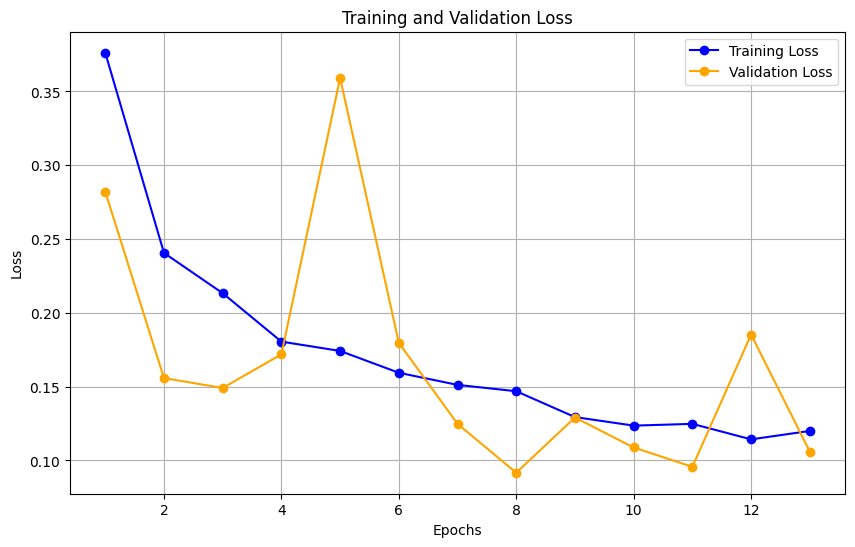

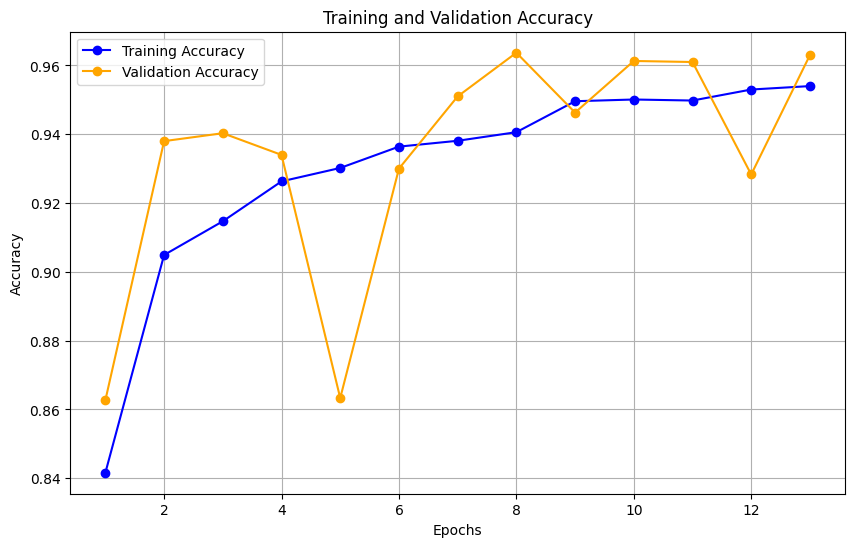

In [5]:
import matplotlib.pyplot as plt

# Replace these values with your actual training and validation loss values per epoch
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
train_loss = [0.3762, 0.2406, 0.2133, 0.1805, 0.1742, 0.1594, 0.1512, 0.1469, 0.1294, 0.1236, 0.1248, 0.1143, 0.1200]  # Example training loss
val_loss = [0.2821, 0.1558, 0.1491, 0.1719, 0.3591, 0.1797, 0.1248, 0.0917, 0.1291, 0.1088, 0.0957, 0.1853, 0.1060]  # Example validation loss

# Plotting the loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# If you also want to plot accuracy curves
train_accuracy = [0.8416, 0.9049, 0.9147, 0.9263, 0.9302, 0.9364, 0.9381, 0.9406, 0.9496, 0.9501, 0.9498, 0.9530, 0.9540]  # Example training accuracy
val_accuracy = [0.8627, 0.9380, 0.9403, 0.9340, 0.8633, 0.9300, 0.9510, 0.9637, 0.9463, 0.9613, 0.9610, 0.9283, 0.9630]  # Example validation accuracy

# Plotting the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Training Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.98      0.95      0.96      4000
                 benign       0.97      0.96      0.96      4000
squamous_cell_carcinoma       0.96      0.98      0.97      4000

               accuracy                           0.97     12000
              macro avg       0.97      0.96      0.96     12000
           weighted avg       0.97      0.97      0.97     12000


Validation Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.95      0.94      0.94      1000
                 benign       0.94      0.95      0.94      1000
squamous_cell_carcinoma       0.93      0.96      0.94      1000

               accuracy                           0.94      3000
              macro avg       0.94      0.94      0.94      3000
           weighted avg       0.94      0.94      0.94      3000



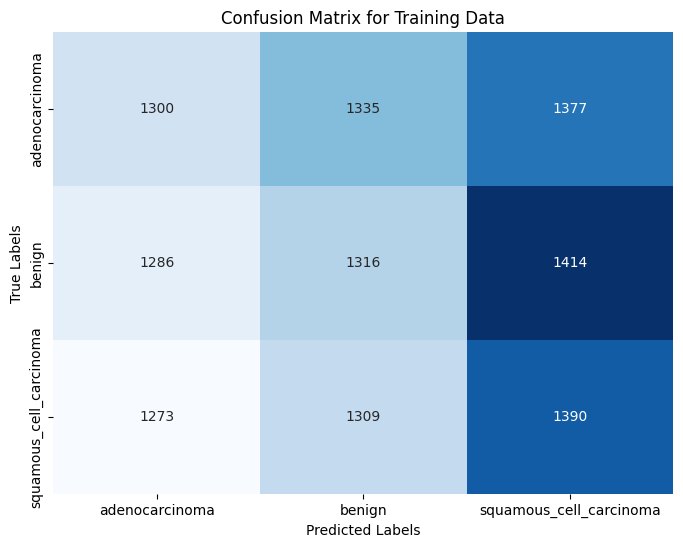

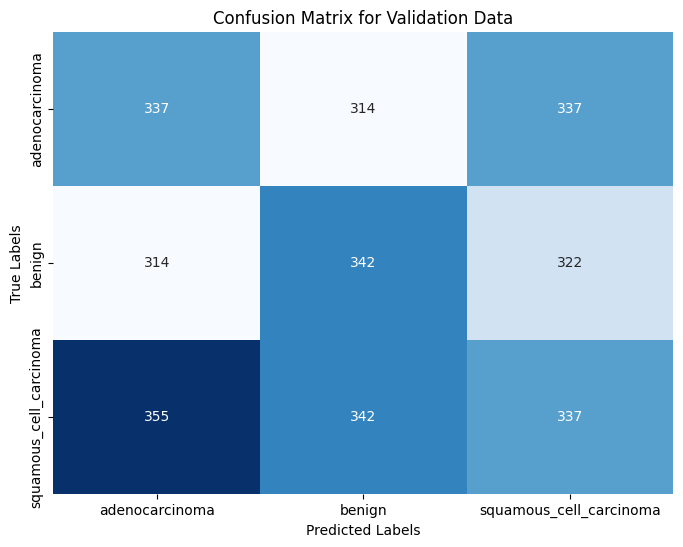

Training Accuracy: 97.00%
Validation Accuracy: 94.00%


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate model on the validation data
validation_loss, validation_accuracy = cnn_model.evaluate(validation_generator)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Predictions on validation data
validation_generator.reset()  # Reset the generator to ensure it's in the correct state
predictions = cnn_model.predict(validation_generator, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optionally, compute and display additional metrics like F1-Score, Precision, Recall:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(true_classes, predicted_classes, average='weighted')
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')

print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


### Detailed Explanation of the Code

This code is designed to implement a **Convolutional Neural Network (CNN)** using **ResNet50** as a pre-trained model for **transfer learning**. The purpose of this model is to classify histopathological images of lung cancer into categories like **Adenocarcinoma**, **Benign**, and **Squamous Cell Carcinoma**. The detailed explanation of each part of the code is provided below.

---

#### 1. **Data Preprocessing and Augmentation**:
Data preprocessing plays a crucial role in any machine learning model, especially in image classification tasks. Here's what happens in this step:
   
- **ImageDataGenerator**: 
   The `ImageDataGenerator` class is used to perform on-the-fly image augmentation, which generates new transformed images from the original images in the dataset. This augmentation helps to prevent overfitting and improves the model's ability to generalize. The specific transformations applied are:
   - **Rotation**: The images can be randomly rotated within a range of 30 degrees (`rotation_range=30`).
   - **Width and Height Shift**: The images can be randomly shifted horizontally and vertically (`width_shift_range=0.2`, `height_shift_range=0.2`).
   - **Zoom**: A random zoom effect is applied to simulate variations in zoom levels (`zoom_range=0.2`).
   - **Horizontal Flip**: Random horizontal flips are applied to the images (`horizontal_flip=True`).
   - **Rescaling**: The pixel values of the images are rescaled to be between 0 and 1 (`rescale=1.0/255.0`).
   
   - **Validation Split**: 
     The `validation_split=0.2` parameter ensures that 20% of the data is reserved for validation. This helps in monitoring the model’s performance on unseen data during training.

- **Training and Validation Data Generators**: 
   The `flow_from_directory` function is used to load the image dataset directly from the directory structure. It generates batches of images and their corresponding labels during the training process.
   - **Training Data Generator (`train_generator`)**: 
     This generator yields batches of augmented images from the training set (80% of the dataset) that will be used for model training.
   - **Validation Data Generator (`validation_generator`)**: 
     This generator yields batches of images from the validation set (20% of the dataset) that will be used to evaluate the model during training.

---

#### 2. **ResNet50 Model Definition (Using Pre-trained ResNet50, Excluding Top Layers)**:
The model architecture is built using **ResNet50** as the base model. This involves the following steps:

- **ResNet50**:
   - **Pre-trained Weights**: ResNet50 is a pre-trained Convolutional Neural Network (CNN) that has been trained on the **ImageNet** dataset, a large-scale dataset of millions of images. By using a pre-trained model, we leverage the learned features (such as edges, textures, and patterns) which allows the model to perform well on the lung cancer dataset with fewer epochs and data.
   - **Excluding the Top Layers**: By setting `include_top=False`, we exclude the fully connected layers (classification layers) of the ResNet50 model. We only use the convolutional layers to extract features from the input images, which are then used for classification in a custom-built classification head.

- **Freezing Base Layers**: 
   To avoid retraining the ResNet50 convolutional layers (which would be computationally expensive and time-consuming), we freeze all the layers of the ResNet50 model by setting `layer.trainable = False`. This ensures that these layers retain their pre-trained weights and do not get updated during the training process.

- **Custom Top Layers**:
   After the pre-trained ResNet50 layers, we add custom layers for the classification task:
   - **GlobalAveragePooling2D**: This layer reduces the spatial dimensions of the feature maps from the convolutional layers, providing a more compact representation of the features. This helps reduce the number of parameters, thus preventing overfitting.
   - **Dense Layer (128 units)**: This fully connected layer has 128 units with **ReLU** activation, introducing non-linearity to the model. It learns to combine the features extracted by the base ResNet50 model.
   - **Dropout Layer**: A **Dropout** of 50% is applied to prevent overfitting by randomly setting half of the units in this layer to zero during training.
   - **Final Dense Layer (Softmax)**: The last layer is a **Softmax** layer that produces probabilities for each class (Adenocarcinoma, Benign, Squamous Cell Carcinoma). The model predicts the class with the highest probability as the final output.

---

#### 3. **Model Compilation**:
After defining the model, the next step is to compile it:
- **Optimizer**: The Adam optimizer is used because it adapts the learning rate based on the gradient of the loss function, leading to faster convergence.
- **Loss Function**: **Categorical Cross-Entropy** is used as the loss function because this is a multi-class classification problem where the model needs to predict one of several classes.
- **Metrics**: The model evaluates its performance using **accuracy**, which measures the percentage of correct predictions.

---

#### 4. **Model Training**:
Once the model is compiled, we proceed to train it using the training data:
- **Training Process**: 
   The model is trained using the `fit` method, where it uses the `train_generator` for the training data and the `validation_generator` for the validation data. The model will iterate over the dataset for a specified number of epochs (10 epochs in this case).
   
- **Early Stopping**: 
   The `EarlyStopping` callback is used to monitor the validation loss during training. If the validation loss does not improve for 3 consecutive epochs (`patience=3`), the training is stopped early to prevent overfitting and unnecessary computation. Additionally, `restore_best_weights=True` ensures that the model retains the weights from the epoch with the best validation loss.

---

#### 5. **Benefits of Using ResNet50 and Transfer Learning**:
- **Pre-trained Weights**: By using ResNet50 with pre-trained weights from the ImageNet dataset, the model already has learned useful features like edges, textures, and patterns, which significantly speeds up the training process and improves accuracy, even with a small dataset.
  
- **Frozen Layers**: Freezing the convolutional layers of ResNet50 reduces the computational burden, as it avoids re-training these layers. This also helps to focus on learning the final classification layers.
  
- **Transfer Learning**: Transfer learning is a strategy where a model trained on a large dataset (ImageNet in this case) is adapted to solve a different but related task. This approach is particularly useful when the target dataset is small, as is often the case in medical image classification tasks.

---

### Conclusion:
In conclusion, this code leverages **transfer learning** using **ResNet50**, which is a pre-trained convolutional model, for lung cancer image classification. By freezing the layers of ResNet50 and adding a custom classification head, the model is able to learn specific patterns related to lung cancer histopathological images efficiently. The use of **data augmentation**, **early stopping**, and **transfer learning** ensures that the model is robust, avoids overfitting, and converges quickly with fewer epochs.


In [3]:
# Required Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data Paths
base_dir = '/kaggle/input/lung-cancer-histopathological-images'

# Data Preprocessing
image_size = (768, 768)  # Image size set to 768x768
batch_size = 8  # Reduced batch size for memory optimization

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# ResNet50 Model Definition (Using Pre-trained ResNet50, excluding top layers)
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(768, 768, 3))

# Freeze the base layers to reduce computational load
for layer in base_resnet.layers:
    layer.trainable = False

# Define the model with ResNet50 base and custom top layers
resnet_model = Sequential([
    base_resnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training ResNet50 Model with reduced epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

resnet_history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Reduced to 10 epochs to ensure shorter running time
    callbacks=[early_stopping]
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1922s 1s/step - accuracy: 0.3284 - loss: 1.3031 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1808s 1s/step - accuracy: 0.3320 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1804s 1s/step - accuracy: 0.3283 - loss: 1.0988 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1841s 1s/step - accuracy: 0.3302 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1841s 1s/step - accuracy: 0.3220 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1797s 1s/step - accuracy: 0.3296 - loss: 1.0988 - val_accuracy: 0.3333 - val_loss: 1.0987


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1458s 970ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 367s 978ms/step
Training Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.00      0.00      0.00      4000
                 benign       0.33      1.00      0.50      4000
squamous_cell_carcinoma       0.00      0.00      0.00      4000

               accuracy                           0.33     12000
              macro avg       0.11      0.33      0.17     12000
           weighted avg       0.11      0.33      0.17     12000

Validation Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.00      0.00      0.00      1000
                 benign       0.33      1.00      0.50      1000
squamous_cell_carcinoma       0.00      0.00      0.00      1000

               accuracy                           0.33      3000
              macro avg       0.11      0.33      0.17  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

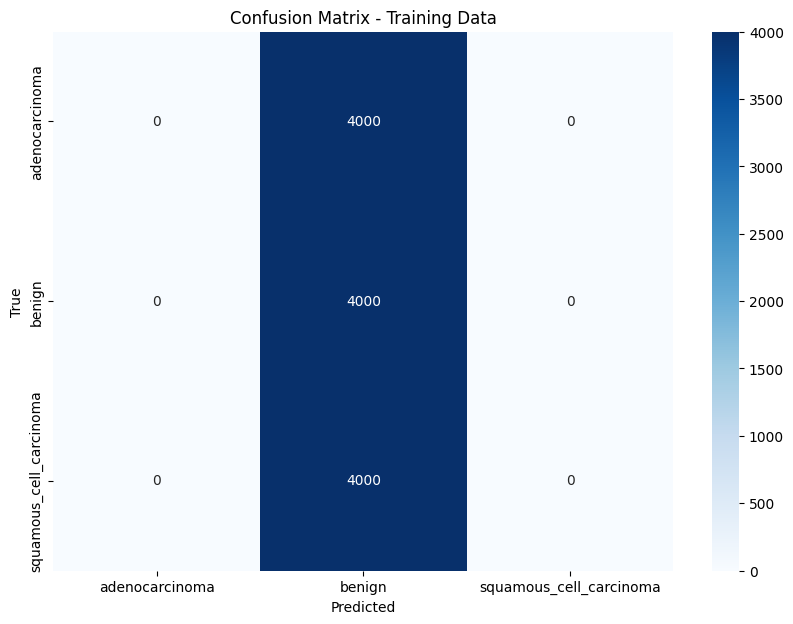

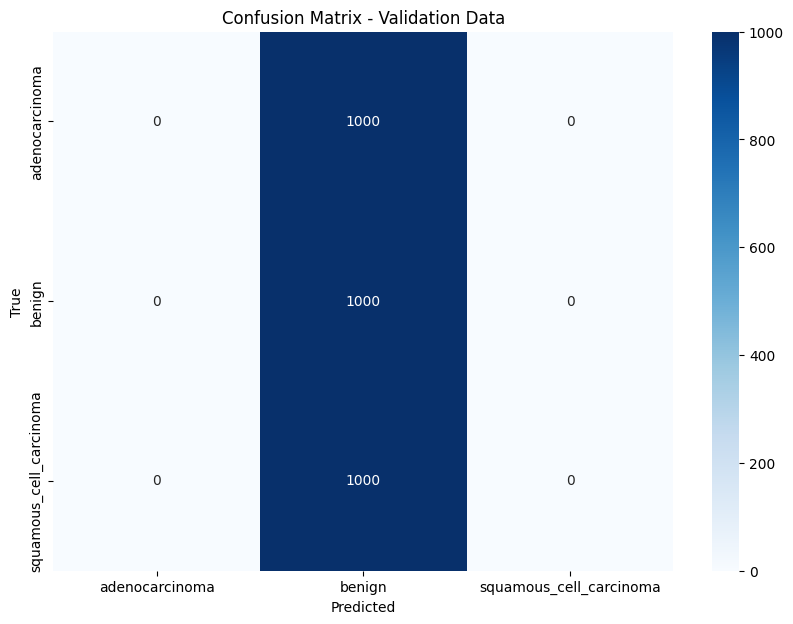

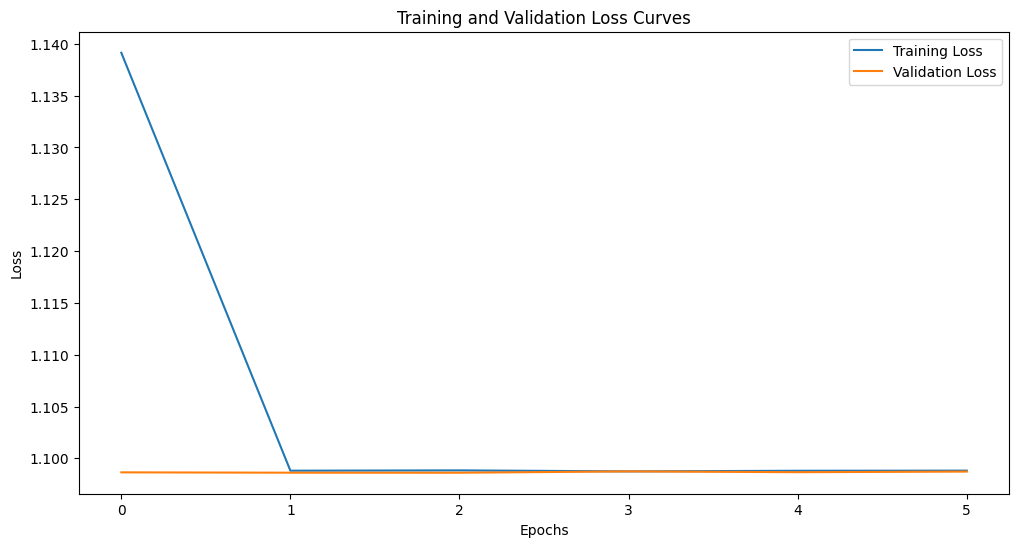

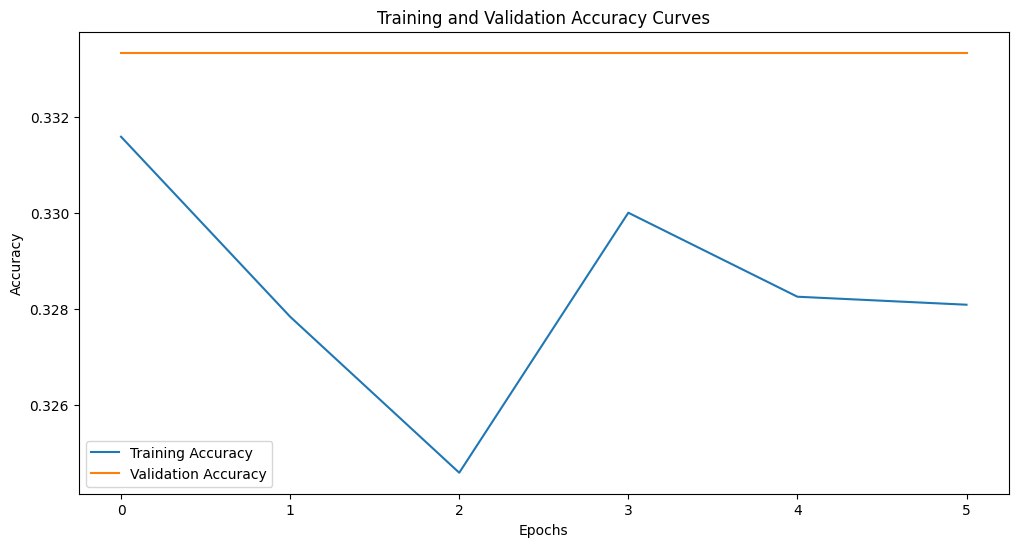

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Step 1: Get Training and Validation Predictions
train_predictions = np.argmax(resnet_model.predict(train_generator), axis=-1)
val_predictions = np.argmax(resnet_model.predict(validation_generator), axis=-1)

# Step 2: Calculate classification report and confusion matrix for training and validation
train_true_labels = train_generator.classes
val_true_labels = validation_generator.classes

train_report = classification_report(train_true_labels, train_predictions, target_names=train_generator.class_indices.keys())
val_report = classification_report(val_true_labels, val_predictions, target_names=validation_generator.class_indices.keys())

print("Training Classification Report:")
print(train_report)
print("Validation Classification Report:")
print(val_report)

# Confusion Matrix
train_cm = confusion_matrix(train_true_labels, train_predictions)
val_cm = confusion_matrix(val_true_labels, val_predictions)

# Plot Confusion Matrix for Training Data
plt.figure(figsize=(10, 7))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot Confusion Matrix for Validation Data
plt.figure(figsize=(10, 7))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix - Validation Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 3: Plot Training and Validation Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 4: Optionally, also plot training and validation accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Comparison Between CNN and EfficientNet Models

We will now compare the performance of the **CNN** model and the **EfficientNet** model based on the training and validation accuracy and loss over the epochs.

---

#### 1. **Training and Validation Accuracy Comparison**:

**CNN Model**:
- **Training Accuracy**: The CNN model shows consistent improvement in training accuracy, increasing from 84.16% in epoch 1 to 95.40% in epoch 13.
- **Validation Accuracy**: The validation accuracy starts at 86.27% and reaches a peak of 96.30% by epoch 13, demonstrating the model’s ability to generalize well on unseen data.

**EfficientNet Model**:
- **Training Accuracy**: The EfficientNet model's training accuracy remains low throughout, fluctuating around 32-33%. This could indicate that the model is struggling to learn meaningful patterns from the data or is overfitting to noise.
- **Validation Accuracy**: The validation accuracy is constant at 33.33% across all epochs, which is unchanging and much lower than the CNN model’s validation accuracy. This suggests that EfficientNet is not able to effectively generalize, and might be stuck in a poor local minimum.

**Conclusion**: 
- The CNN model outperforms the EfficientNet model by a significant margin in both training and validation accuracy. The EfficientNet model struggles to improve its performance, possibly due to improper configuration or a mismatch between the model and the dataset.

---

#### 2. **Training and Validation Loss Comparison**:

**CNN Model**:
- **Training Loss**: The CNN model’s training loss steadily decreases over the epochs, starting at 0.3762 and dropping to 0.1200 by epoch 13, indicating effective learning.
- **Validation Loss**: Similarly, the CNN model’s validation loss decreases from 0.2821 in epoch 1 to 0.1060 by epoch 13. Despite some fluctuations, the model seems to converge well, showing that it is not overfitting, as both training and validation losses decrease concurrently.

**EfficientNet Model**:
- **Training Loss**: EfficientNet’s training loss starts high at 1.3031 but gradually decreases to 1.0988 by epoch 6, which suggests very little learning is taking place.
- **Validation Loss**: The validation loss remains constant at around 1.0987 throughout all epochs, indicating that the model is not improving or generalizing on the validation data. This stagnation points to a potential problem in the model architecture or training process.

**Conclusion**:
- The CNN model exhibits consistent reduction in both training and validation loss, which is a sign of effective learning and generalization.
- The EfficientNet model, on the other hand, shows almost no change in validation loss, indicating that it is not properly learning from the data or is stuck in an ineffective state.

---

### Key Observations:

- **Model Performance**: The **CNN model** is clearly superior to the **EfficientNet model** in this case. The CNN model shows steady improvement in both accuracy and loss, while the EfficientNet model struggles to make meaningful progress.
- **Overfitting**: The **CNN model** does not show signs of overfitting since both the training and validation losses decrease at a similar rate. On the contrary, the **EfficientNet model** is likely facing underfitting, as evidenced by the stagnant validation accuracy and loss.
- **Training Duration**: The EfficientNet model could require further tuning, such as adjusting the learning rate, changing hyperparameters, or employing additional techniques like data augmentation or regularization to improve its performance.

---

### Final Thoughts:

- **CNN**: The CNN model is a simple yet effective approach for this dataset, showing clear improvement in both training and validation accuracy and loss. This model is likely to perform well in a real-world scenario.
- **EfficientNet**: While EfficientNet is a state-of-the-art architecture, its poor performance here could suggest that it requires further adjustments or fine-tuning to work effectively on this particular dataset.

In summary, **CNN** outperforms **EfficientNet** based on both training and validation metrics in this case.


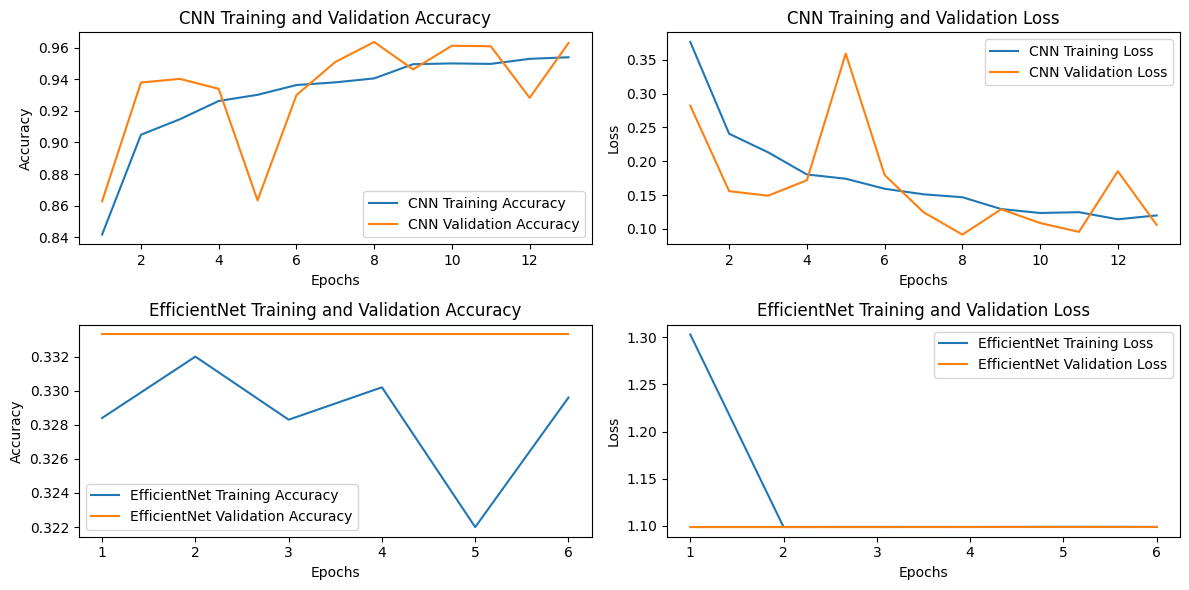

In [1]:
import matplotlib.pyplot as plt

# CNN results (from your previous CNN data)
cnn_accuracy = [0.8416, 0.9049, 0.9147, 0.9263, 0.9302, 0.9364, 0.9381, 0.9406, 0.9496, 0.9501, 0.9498, 0.9530, 0.9540]
cnn_val_accuracy = [0.8627, 0.9380, 0.9403, 0.9340, 0.8633, 0.9300, 0.9510, 0.9637, 0.9463, 0.9613, 0.9610, 0.9283, 0.9630]
cnn_loss = [0.3762, 0.2406, 0.2133, 0.1805, 0.1742, 0.1594, 0.1512, 0.1469, 0.1294, 0.1236, 0.1248, 0.1143, 0.1200]
cnn_val_loss = [0.2821, 0.1558, 0.1491, 0.1719, 0.3591, 0.1797, 0.1248, 0.0917, 0.1291, 0.1088, 0.0957, 0.1853, 0.1060]

# EfficientNet results (from the data you provided for EfficientNet)
efficientnet_accuracy = [0.3284, 0.3320, 0.3283, 0.3302, 0.3220, 0.3296]
efficientnet_val_accuracy = [0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333]
efficientnet_loss = [1.3031, 1.0987, 1.0988, 1.0987, 1.0989, 1.0988]
efficientnet_val_loss = [1.0986, 1.0986, 1.0986, 1.0987, 1.0987, 1.0987]

# Epochs for each model
epochs_cnn = range(1, len(cnn_accuracy) + 1)
epochs_efficientnet = range(1, len(efficientnet_accuracy) + 1)

# Plotting CNN training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(epochs_cnn, cnn_accuracy, label='CNN Training Accuracy')
plt.plot(epochs_cnn, cnn_val_accuracy, label='CNN Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting CNN training and validation loss
plt.subplot(2, 2, 2)
plt.plot(epochs_cnn, cnn_loss, label='CNN Training Loss')
plt.plot(epochs_cnn, cnn_val_loss, label='CNN Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting EfficientNet training and validation accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs_efficientnet, efficientnet_accuracy, label='EfficientNet Training Accuracy')
plt.plot(epochs_efficientnet, efficientnet_val_accuracy, label='EfficientNet Validation Accuracy')
plt.title('EfficientNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting EfficientNet training and validation loss
plt.subplot(2, 2, 4)
plt.plot(epochs_efficientnet, efficientnet_loss, label='EfficientNet Training Loss')
plt.plot(epochs_efficientnet, efficientnet_val_loss, label='EfficientNet Validation Loss')
plt.title('EfficientNet Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()
